In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datapane

palette = sns.color_palette("pastel")

In [9]:
article = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/articles_hm.csv") # articles_hm 상품
customer = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/customer_hm.csv") # customer_hm 고객
transaction = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/transactions_hm.csv") # transactions_hm 거래

C:\Users\for\AppData\Local\Temp\ipykernel_11280\2016410225.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


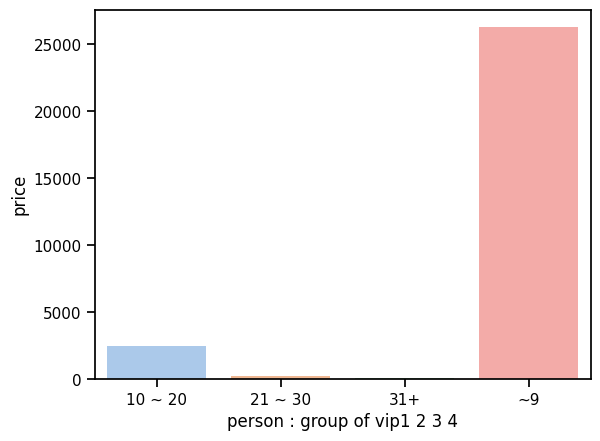

일반 그룹    :  953080
vip그룹      :  95495


In [ ]:
TnA = transaction.merge(article, on = "article_id", how = "inner")
# TnA["customer_id"].value_counts() #소비자 60, 53, 46, 45, 45 ' ' ' 
# >> 1번 구매한 사람들을 걸러내야 한다. 
# 10번 이상 구매부터 임의로 등급을 정해서 vip에 대한 컬럼 생성

cust_counts = TnA["customer_id"].value_counts()
TnA["purchase_count"] = (
    TnA.groupby("customer_id")["price"].transform("size") 
    #행 개수,customer_id가 같아도 해당 행의 count값을 purchase 컬럼 값에 대입. 
    # 따라서 행의 개수는 변하지 않는다
)
TnA_10 = TnA.loc[
    (TnA["purchase_count"] >= 10) & (TnA["purchase_count"] <= 20)
]


TnA_20 = TnA.loc[
    (TnA["purchase_count"] >= 21) & (TnA["purchase_count"] <= 30)
]
TnA_30 = TnA.loc[
    (TnA["purchase_count"] >= 31)
]

TnA_else = TnA.loc[
    (TnA["purchase_count"] <= 9)
]

# TnA_10.count() #84588
# TnA_20.count() #8772
# TnA_30.count() #2135

sales_10 = TnA_10["price"].sum()
sales_20 = TnA_20["price"].sum()
sales_30 = TnA_30["price"].sum()
sales_else = TnA_else["price"].sum()

sales_df = pd.DataFrame({
    "group" : ["10 ~ 20", "21 ~ 30", "31+", "~9"],
    "price" : [sales_10, sales_20, sales_30, sales_else]
})
# plt.xlabel("person : group of vip1 2 3")
# plt.ylabel("price")


sns.barplot(
    data=sales_df,
    x="group",
    y="price",
    palette="pastel"      
)
plt.xlabel("person : group of vip1 2 3 4")
plt.ylabel("price")
plt.show()

# 결과값이 bool이므로 count하면 nan이 아닌 값만 출력. 
# 따라서 sum으로 카운트 해줘야 한다.
print("일반 그룹    : ", (TnA["purchase_count"] <= 9).sum())
print("vip그룹      : ", (TnA["purchase_count"] >= 10).sum())



In [6]:
TnA["customer_id"].value_counts() #소비자 60, 53, 46, 45, 45 ' ' ' 

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    60
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    53
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    46
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172    45
21dc541f04d2e07c098fe65c6d5de0c585dd9c15a338ca9ab876ebb126acf377    45
                                                                    ..
6d03d7e7f9def906d3269d1eaff37a94c222582d66154a507b04eb4d01d3396b     1
705fa443c876ffb6cf115f6178836e7189e70a86181b17e15065c195201ddaf5     1
926009c1e6ef9e8d5f7d5ff5c19e0f5d48c86fb31274f47bd53b045253d8def6     1
af354824485c5f88562b1dcacaa13febdfc61648b3386bf011cc48d0a6dbb400     1
61cb75fa0fa280ccc5b08e71089940424e278cff3e86e4da5ab6d58035113f60     1
Name: customer_id, Length: 458235, dtype: int64

상위 10% :  0.050830508


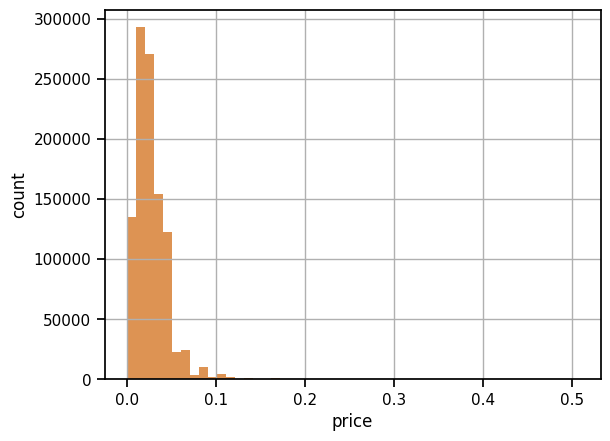

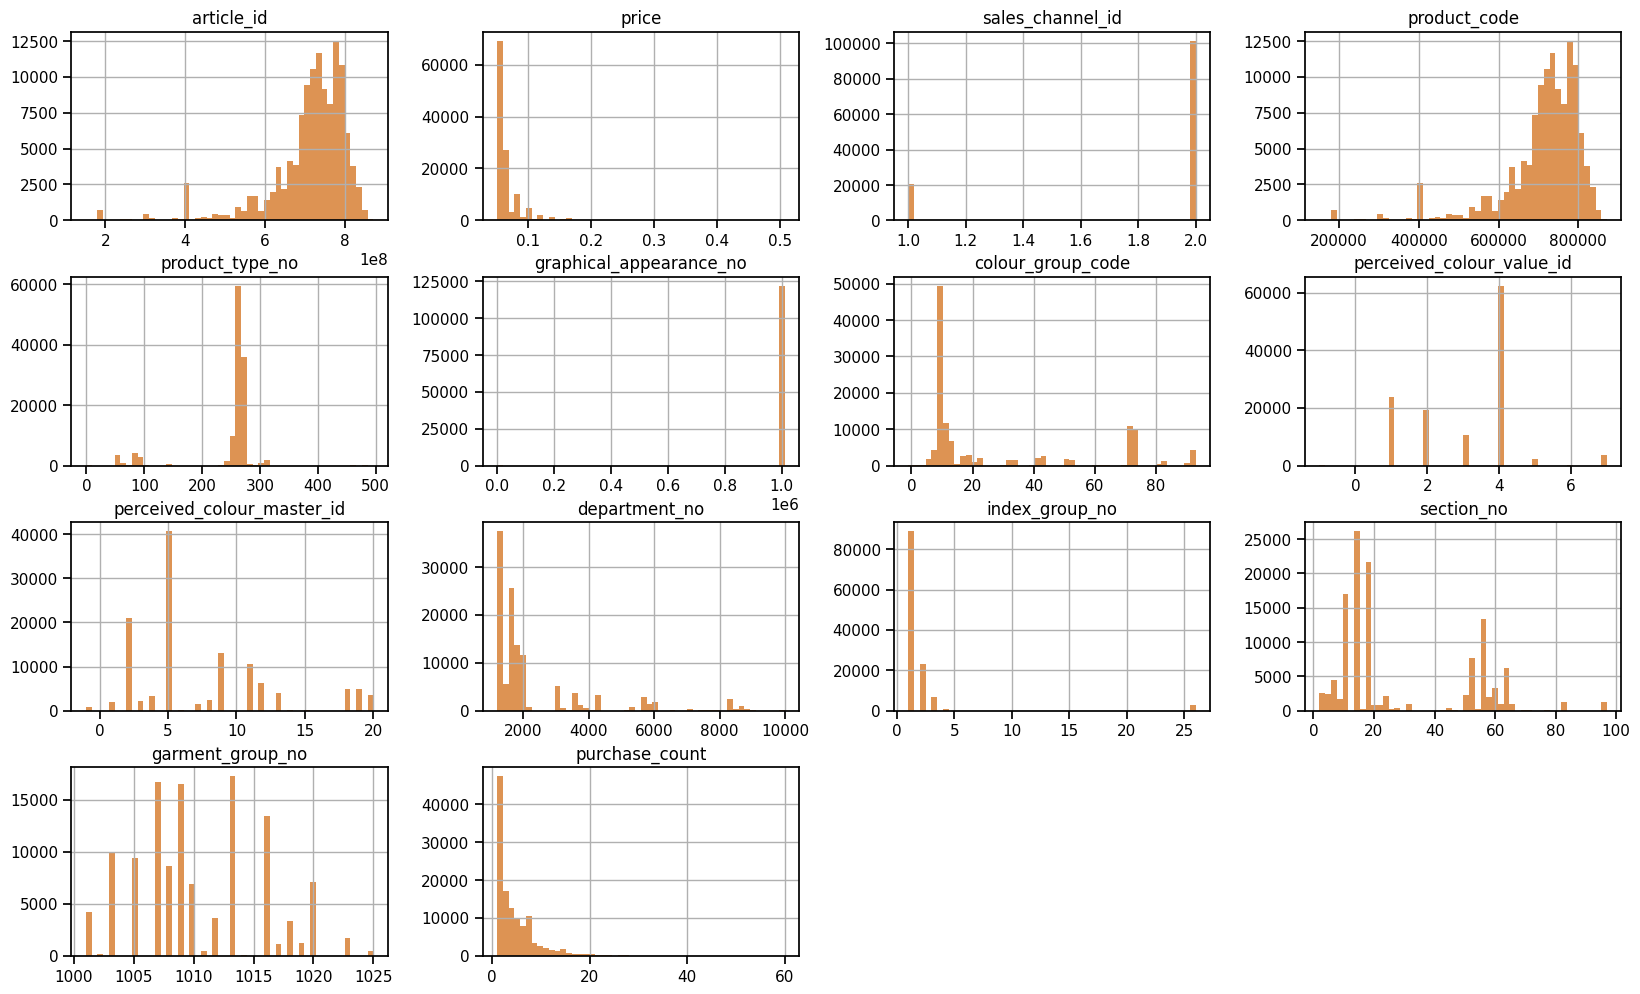

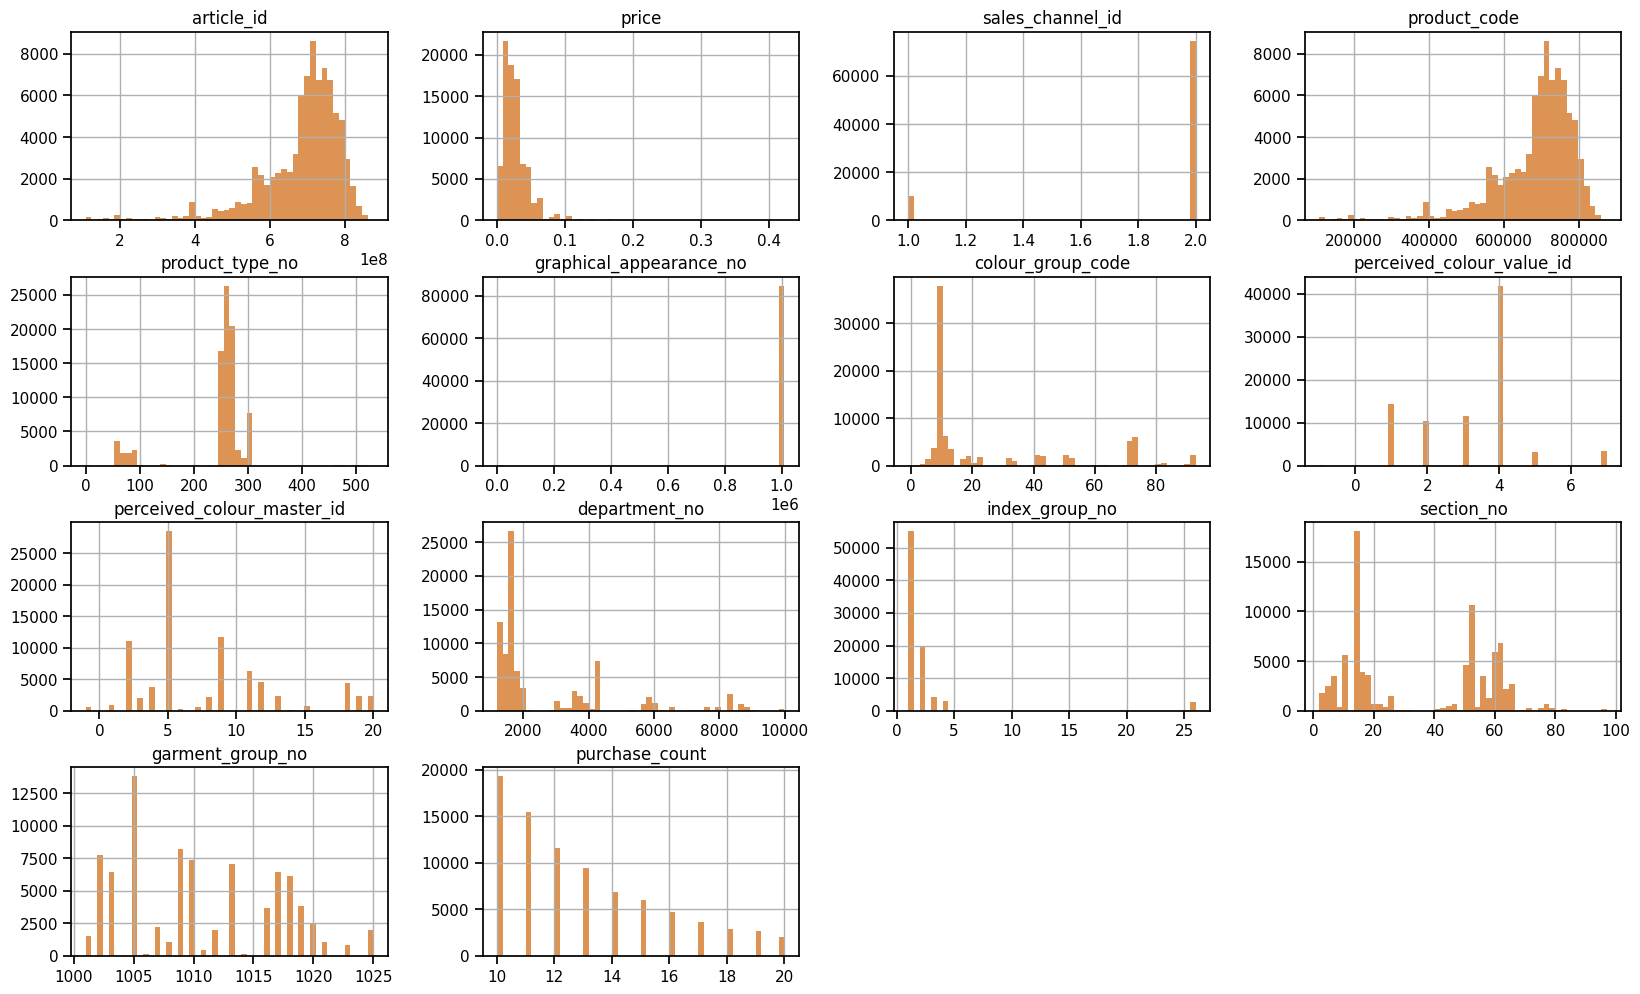

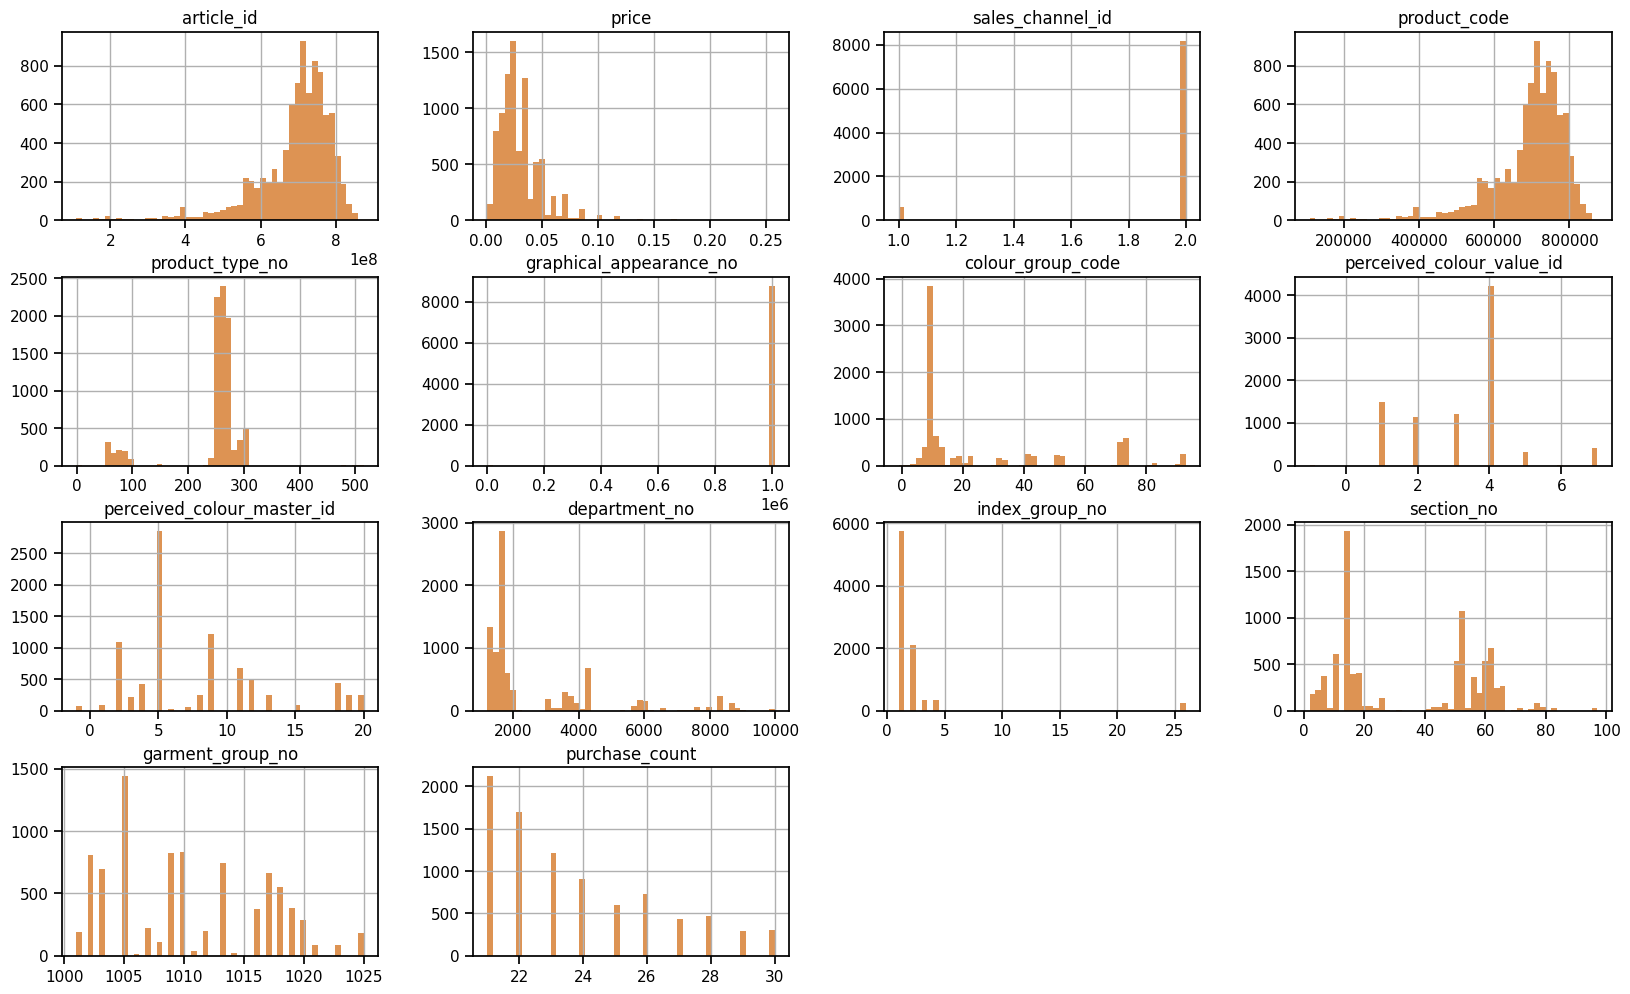

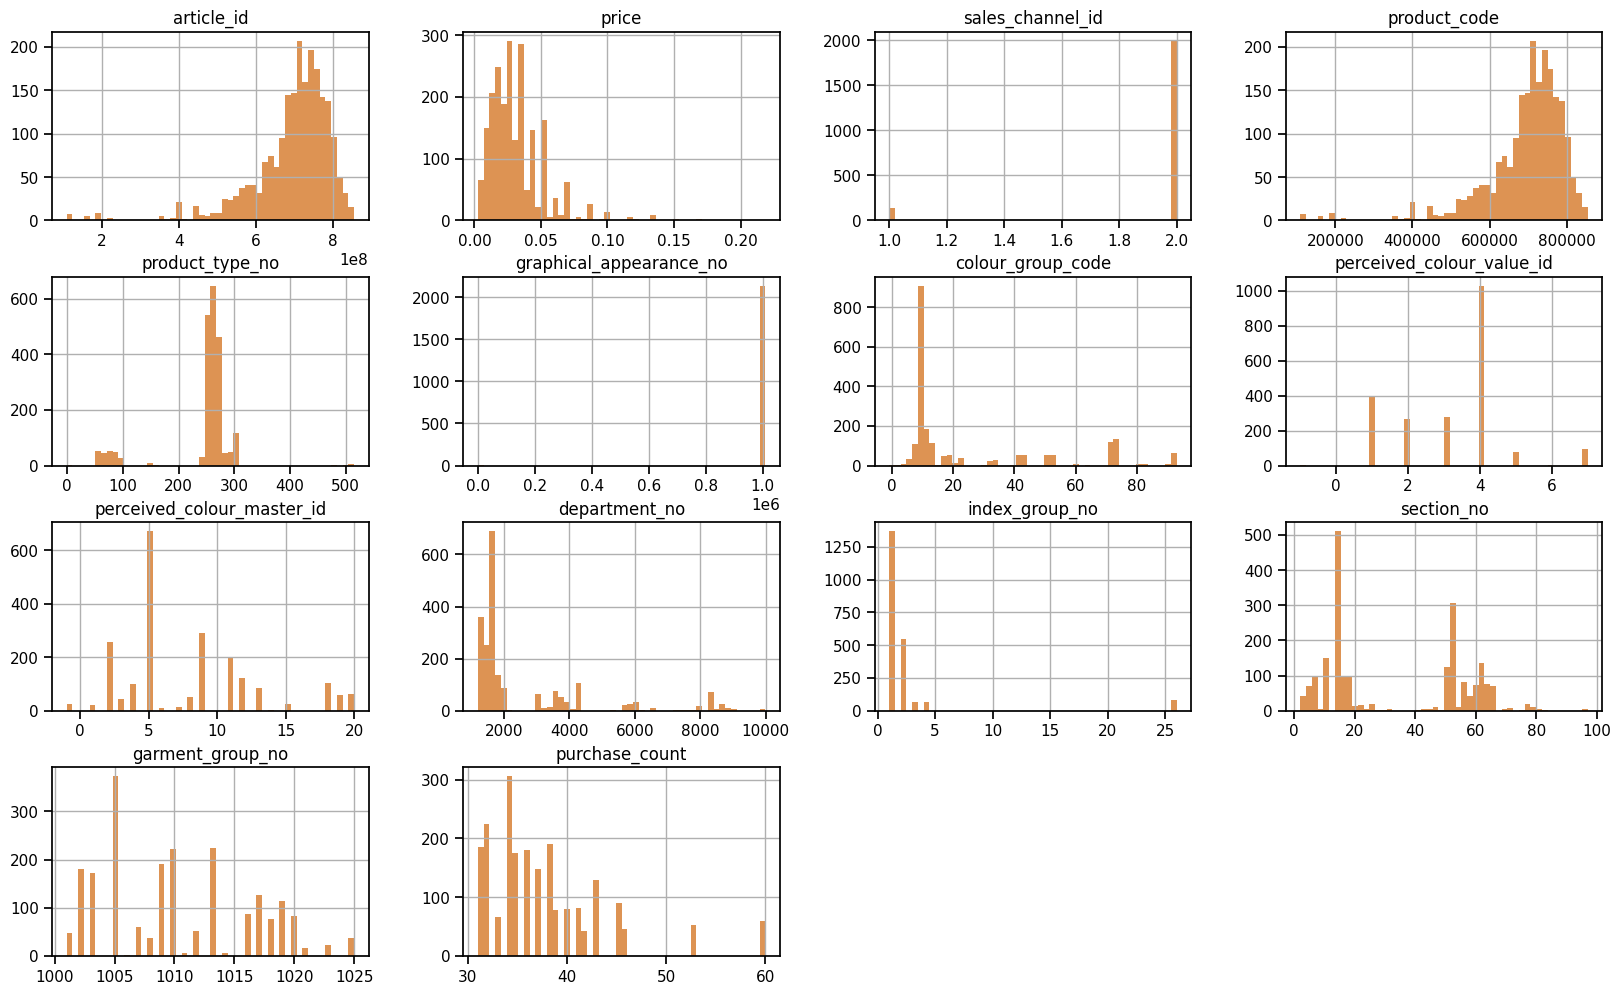

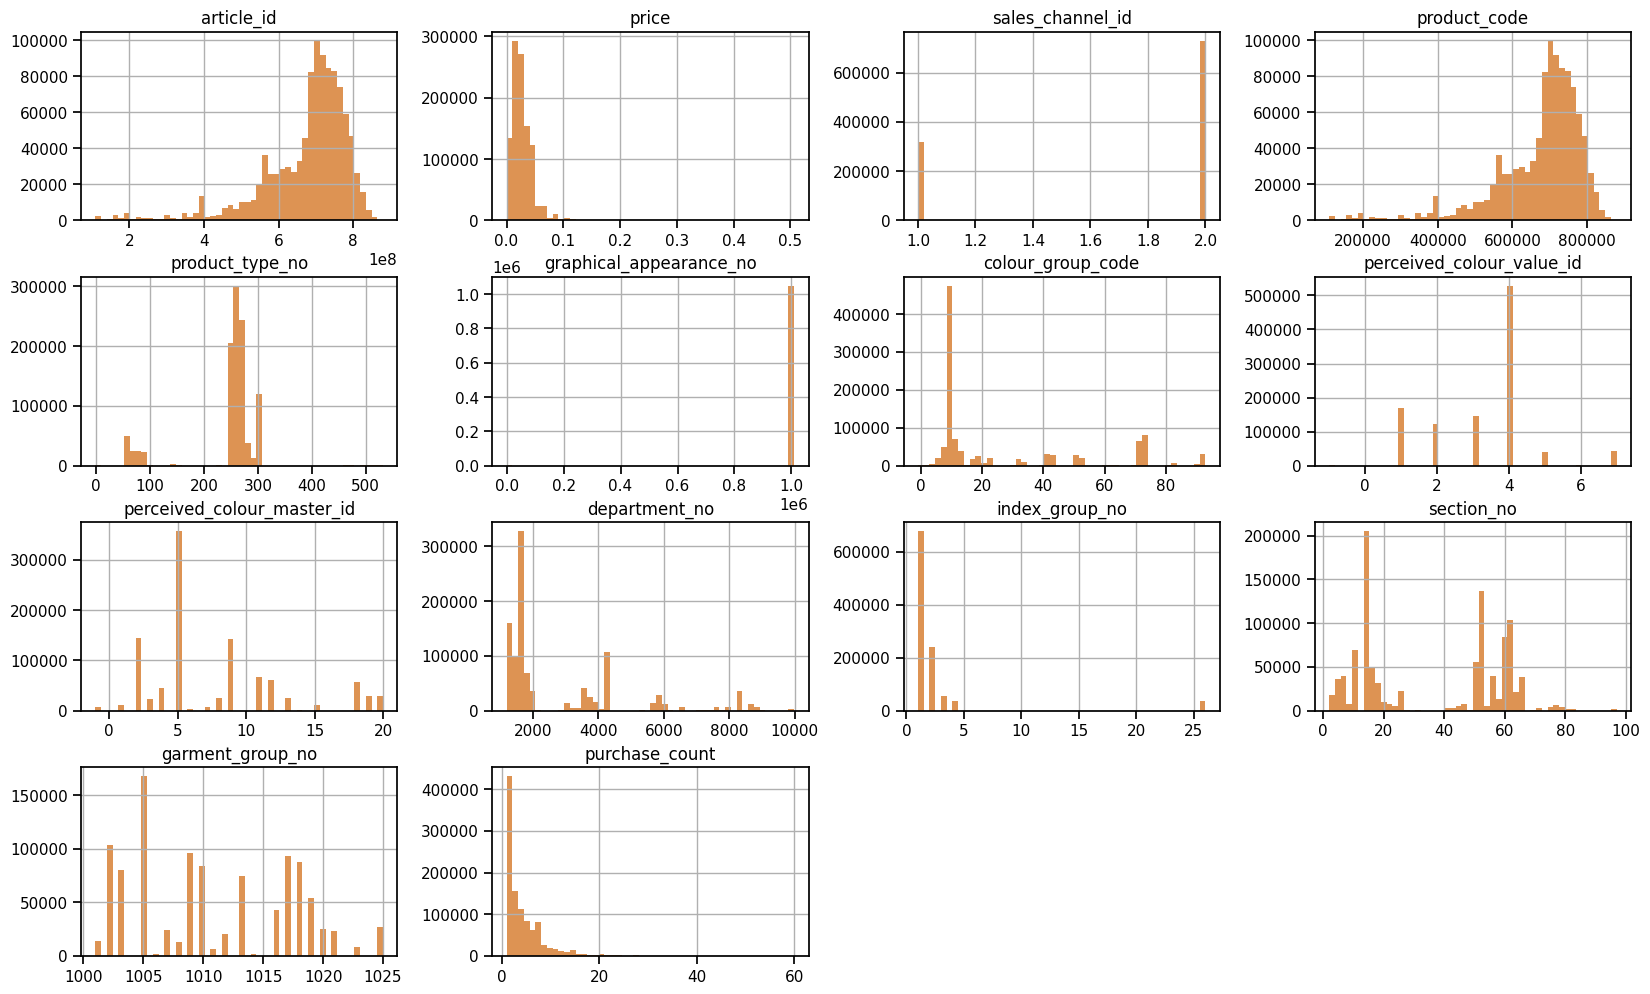

In [ ]:
#전체 데이터, x축 가격, y축 구매횟수
TnA["price"].hist(bins = 50, )
plt.xlabel("price")
plt.ylabel("count")

price_exps = TnA["price"].quantile(0.9) #상위 10%
print("상위 10% : ", price_exps)


TnA_top10p = TnA.loc[TnA["price"] >= price_exps] 
axes1 = TnA_top10p.hist( # 매출 상위 10%
    bins = 50,
    figsize = (20, 12), color = ['#DD9353']
)
axes2 = TnA_10.hist( #10~20번 구매한 사람들
    bins = 50,
    figsize = (20, 12), color = ['#DD9353']
)
axes3 = TnA_20.hist( #21~30번 구매한 사람들
    bins = 50,
    figsize = (20, 12), color = ['#DD9353']
)
axes4 = TnA_30.hist( #30번 이상 구매한 사람들
    bins = 50,
    figsize = (20, 12), color = ['#DD9353']
)
axes5 = TnA.hist( # 전체 데이터
    bins = 50,
    figsize = (20, 12), color = ['#DD9353']
)

